In [1]:
import sys

In [2]:
import pandas as pd
dfMain = pd.read_csv('./dataset.csv')
dfMain.columns

Index(['Category', 'City', 'Country', 'Customer ID', 'Customer Name', 'Market',
       'Order Date', 'Order ID', 'Order Priority', 'Product ID',
       'Product Name', 'Region', 'Row ID', 'Segment', 'Ship Date', 'Ship Mode',
       'State', 'Sub-Category', 'Discount', 'Number of Records', 'Profit',
       'Quantity', 'Sales', 'Shipping Cost'],
      dtype='object')

In [3]:
dfMain[['Category','Discount', 'Number of Records', 'Profit',
       'Quantity', 'Sales', 'Shipping Cost']].head()

,Category,Discount,Number of Records,Profit,Quantity,Sales,Shipping Cost
0,Office Supplies,0.0,1,29.640,4,66,8.17
1,Office Supplies,0.5,1,-26.055,3,45,4.82
2,Office Supplies,0.0,1,106.140,2,408,35.46
3,Furniture,0.1,1,37.770,5,114,4.70
4,Office Supplies,0.1,1,15.342,2,55,1.80


In [4]:
dfMain.isnull().sum()

Category             0
City                 0
Country              0
Customer ID          0
Customer Name        0
Market               0
Order Date           0
Order ID             0
Order Priority       0
Product ID           0
Product Name         0
Region               0
Row ID               0
Segment              0
Ship Date            0
Ship Mode            0
State                0
Sub-Category         0
Discount             0
Number of Records    0
Profit               0
Quantity             0
Sales                0
Shipping Cost        0
dtype: int64

In [5]:
print(dfMain['Sales'].dtype)
dfMain['Sales'] = pd.to_numeric(dfMain['Sales'].str.replace(',',''), errors='raise')
dfMain.isnull().sum()

object


Category             0
City                 0
Country              0
Customer ID          0
Customer Name        0
Market               0
Order Date           0
Order ID             0
Order Priority       0
Product ID           0
Product Name         0
Region               0
Row ID               0
Segment              0
Ship Date            0
Ship Mode            0
State                0
Sub-Category         0
Discount             0
Number of Records    0
Profit               0
Quantity             0
Sales                0
Shipping Cost        0
dtype: int64

In [6]:
df = dfMain.copy()[['Order Date','Category','Discount', 'Number of Records', 'Profit','Quantity', 'Sales', 'Shipping Cost']]
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.sort_values(by = 'Order Date',ascending = True,inplace = True)
df.head(20)

,Order Date,Category,Discount,Number of Records,Profit,Quantity,Sales,Shipping Cost
0,2011-01-01,Office Supplies,0.0,1,29.640,4,66,8.170
1,2011-01-01,Office Supplies,0.5,1,-26.055,3,45,4.820
2,2011-01-01,Office Supplies,0.0,1,106.140,2,408,35.460
3,2011-01-01,Furniture,0.1,1,37.770,5,114,4.700
4,2011-01-01,Office Supplies,0.1,1,15.342,2,55,1.800
5,2011-01-01,Office Supplies,0.1,1,36.036,3,120,9.720
448,2011-01-02,Office Supplies,0.0,1,10.530,3,21,1.860
447,2011-01-02,Technology,0.4,1,-19.136,2,82,6.214
446,2011-01-02,Office Supplies,0.4,1,-0.984,6,10,0.812
445,2011-01-02,Office Supplies,0.4,1,20.024,2,401,21.377


In [54]:
from pylab import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 16, 8
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'

In [8]:
df = df.groupby('Order Date')[['Profit','Sales']].sum()
df.head()

,Profit,Sales
Order Date,,
2011-01-01,198.8730,808
2011-01-02,603.4736,2457
2011-01-03,1905.1539,12567
2011-01-04,-308.7874,2586
2011-01-06,2460.2536,11481


# Profitability - in terms of Profit Margin
We only have the profit and sales data, and hence we use Profit margin as a metric for profitability, apart from the profit value provided

In [9]:
df[df['Sales'] == 0].describe() 

,Profit,Sales
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [10]:
df[df['Sales'] <= 0]

,Profit,Sales
Order Date,,


In [11]:
df['Profit Margin %'] = (df['Profit'] / df['Sales']) * 100
df.head()

,Profit,Sales,Profit Margin %
Order Date,,,
2011-01-01,198.8730,808,24.612995
2011-01-02,603.4736,2457,24.561400
2011-01-03,1905.1539,12567,15.159974
2011-01-04,-308.7874,2586,-11.940735
2011-01-06,2460.2536,11481,21.428914


# Plot of Profit Margin

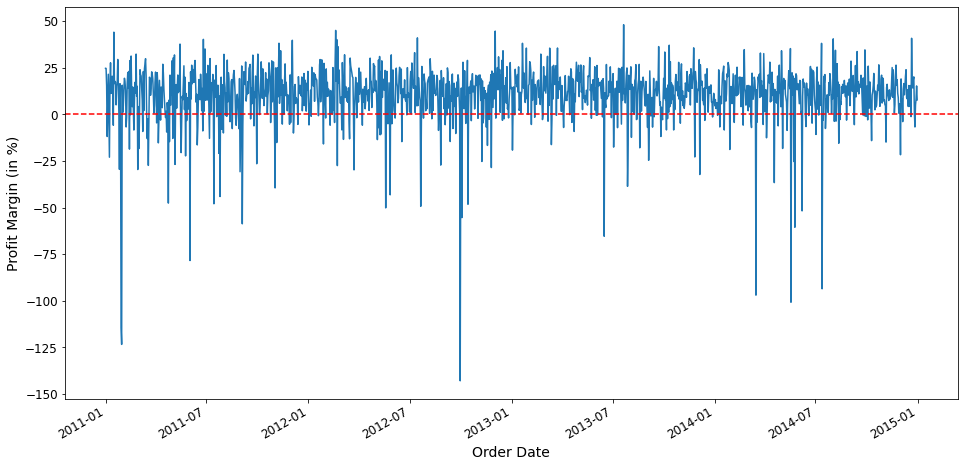

In [12]:
ax = df['Profit Margin %'].plot(ylabel = 'Profit Margin (in %)')
ax.axhline(y = 0,linestyle = '--',color = 'r')

The above plot is quite unreadable, hence we resample it per month by taking the mean and plot it

Text(0, 0.5, 'Mean Profit Margin in a Month (expressed in %)')

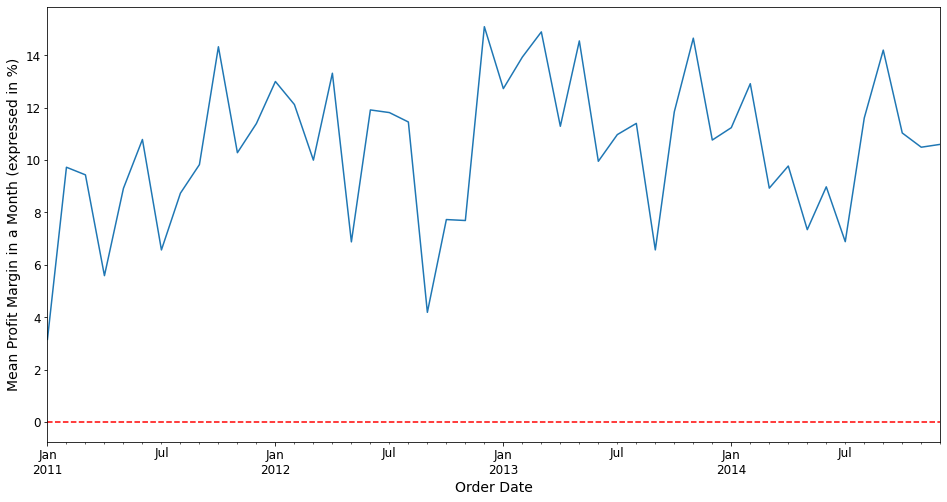

In [13]:
profit_margin_monthly = df['Profit Margin %'].resample('MS').mean()
ax = profit_margin_monthly.plot()
ax.axhline(y = 0,linestyle = '--',color = 'r')
ax.set_ylabel('Mean Profit Margin in a Month (expressed in %)')

# Number of Profitable Days per month (using net profit)

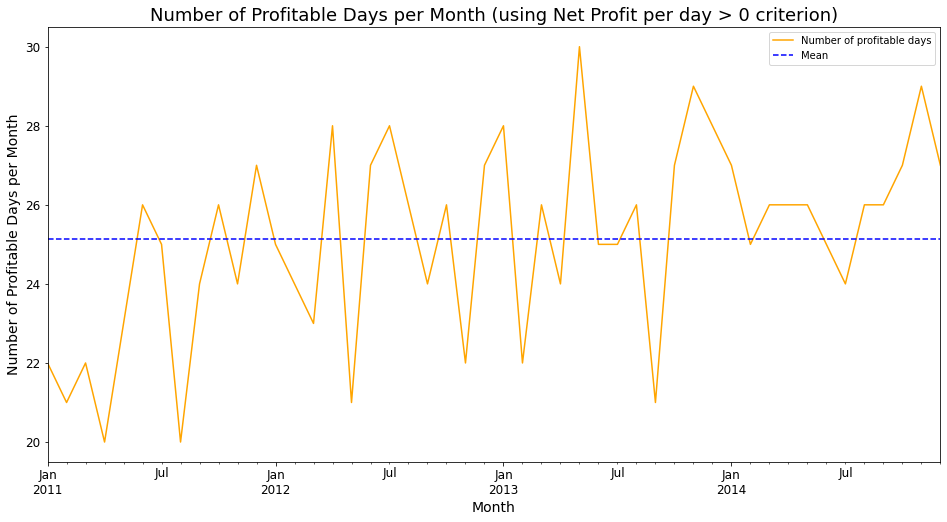

In [66]:
import numpy as np

no_profit_days_monthly_1 = (df['Profit'] > 0).resample('MS').sum()
ax = no_profit_days_monthly_1.plot(xlabel = 'Month',label = 'Number of profitable days',color = '#FFA500')
ax.set_ylabel('Number of Profitable Days per Month')
ax.axhline(y = np.mean(no_profit_days_monthly_1),linestyle = '--',color = 'b',label = 'Mean')
ax.legend()
ax.set_title('Number of Profitable Days per Month (using Net Profit per day > 0 criterion)',size=18)
# plt.savefig('Profitable_days_netProfit.png')

In [15]:
no_profit_days_monthly_1 = no_profit_days_monthly_1.rename('Number of Profitable Days per Month')
no_profit_days_monthly_1.to_csv('Profitable_days_NetProfit.csv')
no_profit_days_monthly_1.head()

Order Date
2011-01-01    22
2011-02-01    21
2011-03-01    22
2011-04-01    20
2011-05-01    23
Freq: MS, Name: Number of Profitable Days per Month, dtype: int64

# Number of Profitable Days per month (using proft margin)

## We consider threshold for a profitable day as >= 12%

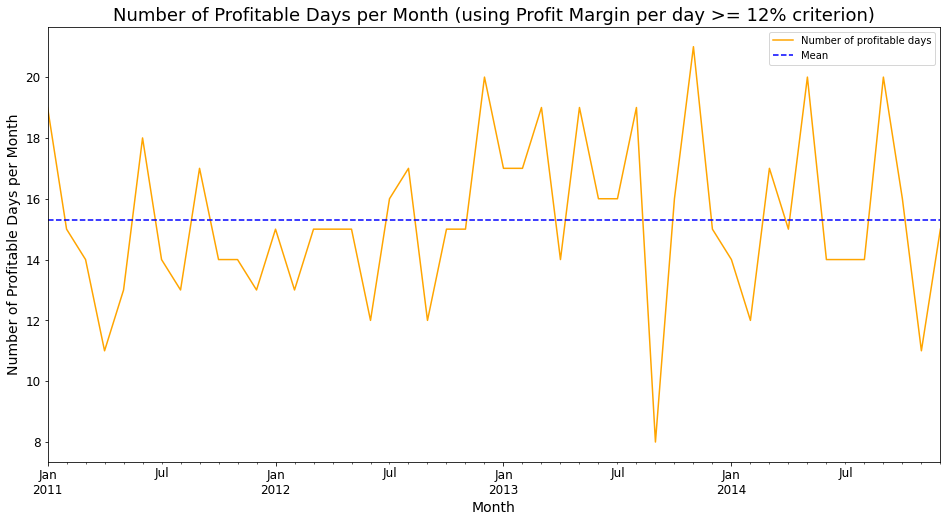

In [79]:
no_profit_days_monthly_2 = (df['Profit Margin %'] >= 12).resample('MS').sum()
ax = no_profit_days_monthly_2.plot(xlabel = 'Month',label = 'Number of profitable days',color = '#FFA500')
ax.set_ylabel('Number of Profitable Days per Month')
ax.axhline(y = np.mean(no_profit_days_monthly_2),linestyle = '--',color = 'b',label = 'Mean')
ax.legend()
ax.set_title('Number of Profitable Days per Month (using Profit Margin per day >= 12% criterion)',size = 18)
plt.savefig('Profitable_days_ProfitMargin.png')

In [17]:
no_profit_days_monthly_2.rename('Number of Profitable Days per Month')
no_profit_days_monthly_2.to_csv('Profitable_days_ProfitMargin.csv')
no_profit_days_monthly_2.head()

Order Date
2011-01-01    7
2011-02-01    5
2011-03-01    9
2011-04-01    5
2011-05-01    6
Freq: MS, Name: Profit Margin %, dtype: int64

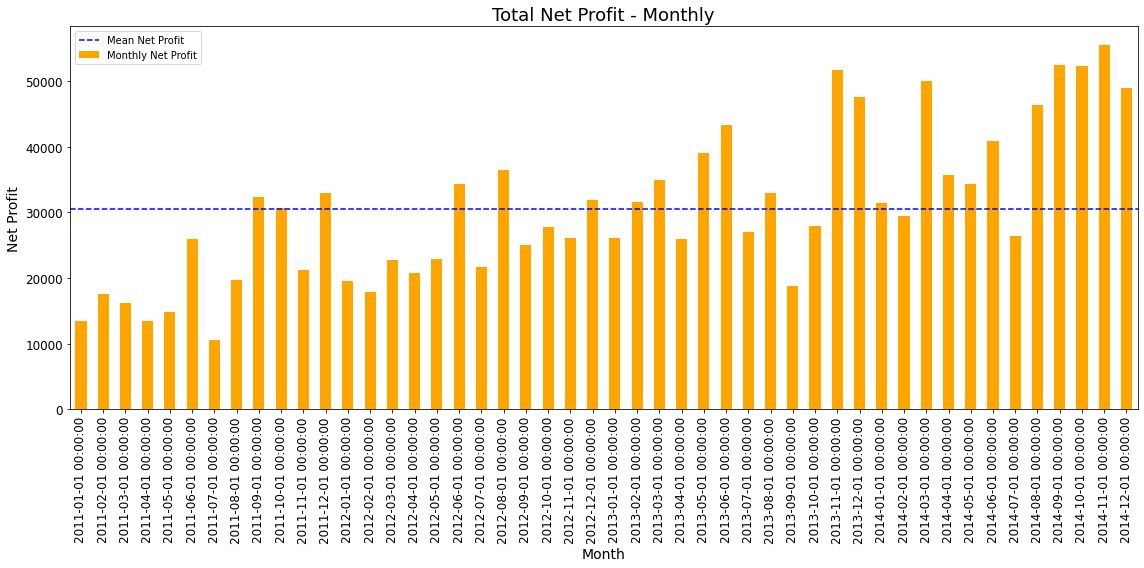

In [61]:
total_profit_monthly = df['Profit'].resample('MS').sum()
ax = total_profit_monthly.plot(kind = 'bar',xlabel = 'Month',label = 'Monthly Net Profit',color = '#FFA500')
ax.set_ylabel('Net Profit')
ax.axhline(y = np.mean(total_profit_monthly),linestyle = '--',color = 'b',label = 'Mean Net Profit')
ax.legend()
ax.set_title('Total Net Profit - Monthly',size=18)
plt.tight_layout()
# plt.savefig('NetProfit_Monthly.png')

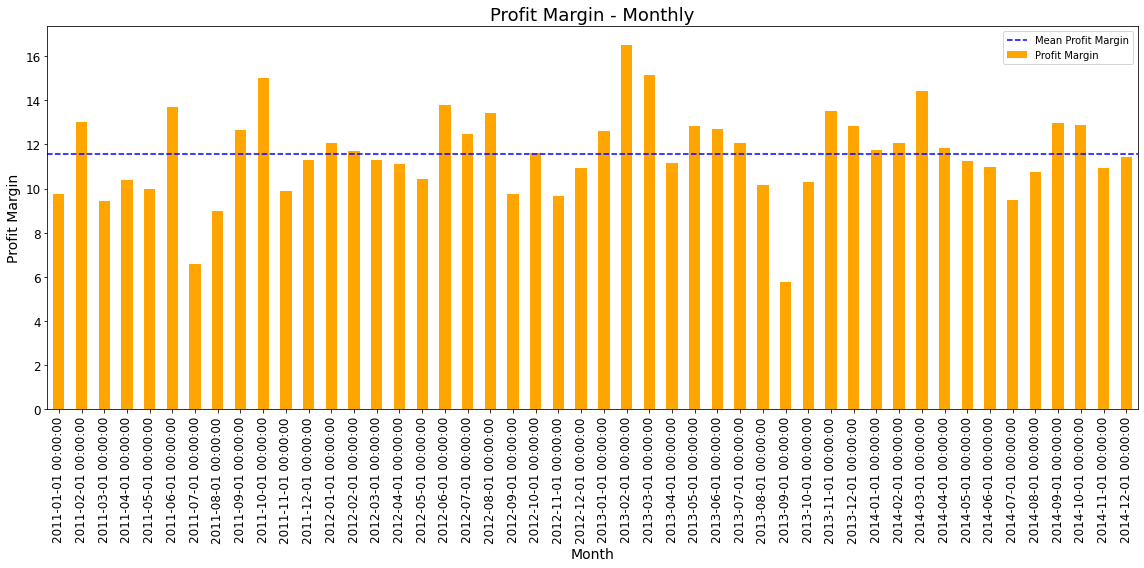

In [78]:
PM_monthly = total_profit_monthly / df['Sales'].resample('MS').sum() * 100
ax = PM_monthly.plot(kind = 'bar',xlabel = 'Month',label = 'Profit Margin',color = '#FFA500')
ax.set_ylabel('Profit Margin')
ax.axhline(y = np.mean(PM_monthly),linestyle = '--',color = 'b',label = 'Mean Profit Margin')
ax.legend()
ax.set_title('Profit Margin - Monthly',size=18)
plt.tight_layout()
plt.savefig('ProfitMargin_Monthly.png')